<a href="https://colab.research.google.com/github/RuwanthiLakshika/Classification-with-TensorFlow/blob/main/Classification_Multiclass_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [3]:
od.download('https://raw.githubusercontent.com/RuwanthiLakshika/Classification-with-TensorFlow/main/dataset%20(1).csv')

8192it [00:00, 413803.24it/s]


In [4]:
data=pd.read_csv('/content/dataset%20(1).csv')

In [5]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [6]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [7]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [8]:
x=data.drop(['Sex'],axis=1)
y=data['Sex']

In [45]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x= pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [46]:
x.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [47]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [50]:
y=y.astype('int')

In [51]:
y.dtype

dtype('int64')

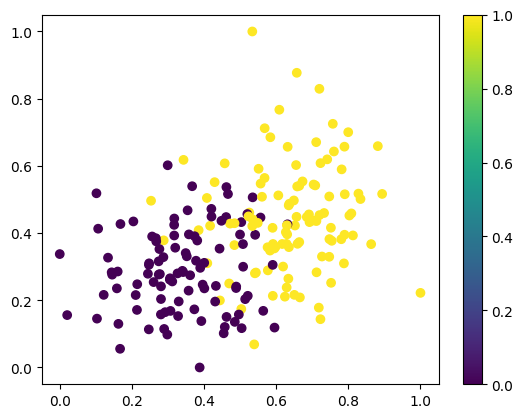

In [52]:
plt.scatter(x['Height'],x['Weight'],c=y)
plt.colorbar()
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train.shape,x_test.shape

((164, 2), (41, 2))

In [55]:
data.shape

(205, 3)

# Model Building

In [67]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
             metrics = ["accuracy"])

# train the model
epoch_number = 20
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/20
6/6 [==============================] - 1s 4ms/step - loss: 0.6886 - accuracy: 0.4512
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.5427
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.5915
Epoch 4/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6284 - accuracy: 0.5976
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.6768
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7744
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.7744
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4959 - accuracy: 0.7866
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.7927
Epoch 10/20
6/6 [==============================] - 0s 5ms/step - loss: 0.4232 - accuracy: 0.8171
Epoch 11/20
6/6 [======================

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                192       
                                                                 
 dense_13 (Dense)            (None, 16)                1040      
                                                                 
 dense_14 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1266 (4.95 KB)
Trainable params: 1266 (4.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Evaluate

In [69]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2681 - accuracy: 0.9024


[0.26809027791023254, 0.9024389982223511]

In [70]:
y_pred=model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [71]:
y_pred[:5]

array([[0.8633638 , 0.13663612],
       [0.0345611 , 0.96543884],
       [0.01421782, 0.98578215],
       [0.7222351 , 0.27776495],
       [0.04857669, 0.9514233 ]], dtype=float32)

In [72]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [62]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [73]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636364>

In [74]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

In [75]:
history.history

{'loss': [0.6886366605758667,
  0.6645442843437195,
  0.6497495770454407,
  0.628369152545929,
  0.6036972999572754,
  0.5752958655357361,
  0.5407792329788208,
  0.4959259033203125,
  0.4642210602760315,
  0.42322269082069397,
  0.38463252782821655,
  0.36003434658050537,
  0.3354839086532593,
  0.3076389729976654,
  0.30293190479278564,
  0.30916261672973633,
  0.2915419936180115,
  0.33236148953437805,
  0.27896344661712646,
  0.3065507113933563],
 'accuracy': [0.45121949911117554,
  0.542682945728302,
  0.5914633870124817,
  0.5975610017776489,
  0.6768292784690857,
  0.7743902206420898,
  0.7743902206420898,
  0.7865853905677795,
  0.792682945728302,
  0.8170731663703918,
  0.8536585569381714,
  0.8414633870124817,
  0.8536585569381714,
  0.8597561120986938,
  0.8475610017776489,
  0.8719512224197388,
  0.8536585569381714,
  0.8475610017776489,
  0.8780487775802612,
  0.8658536672592163]}

<Axes: >

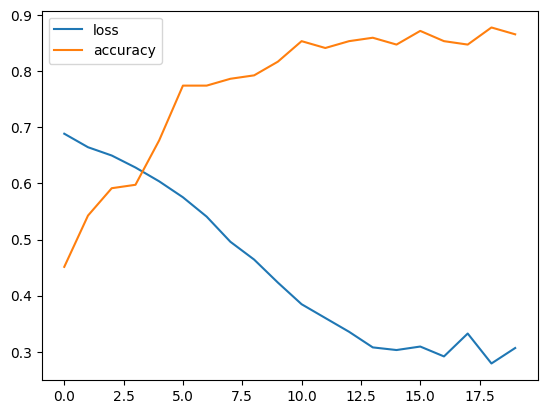

In [76]:
pd.DataFrame(history.history).plot()